# Analyzing Features that Shape Spotify Playlist Curation


## ECE 143 - Group 12
 
Rakshitha Venkappa Handral 
Karan Variyambat
Megna Anand 
Keerthivasan Vijayakumar
Chuqiao Lu


The main research question is to find the audio features that are most important in curating a cohesive playlist. The primary motivation driving this investigation is to establish a quantitative understanding of why certain songs complement each other within a playlist. Uncovering the most influential features is crucial for empowering music platforms like Spotify to automate playlist creation. By analyzing song features, these platforms can discern patterns and correlations, facilitating the automated assembly of playlists based on the identified features that indicate optimal cohesion between songs.

In [1]:
import requests
import json
import time
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
file_path = './merged_playlist_without_duplicates_0_999.csv'
merged_df = pd.read_csv(file_path)

# Definition of Features



Acousticnes number [float] A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

Danceability number [float] Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy number [float] Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

Instrumentalness number [float] Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

Liveness number [float] Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

Loudness number [float] The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Mode integer Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Speechiness number [float] Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

Tempo number [float] The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

Time_signature integer An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

Valence number [float] A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# Cleaning the Dataset

In [3]:
tmp_df = merged_df.drop_duplicates(subset=['TRACK_uri', 'PLAYLIST_id'])

cleaned_df = tmp_df.dropna()

# Calculating max/min/avg number of tracks, artists and songs per playlist

In [4]:

max_songs = cleaned_df.groupby('PLAYLIST_id')['TRACK_uri'].count().max()
min_songs = cleaned_df.groupby('PLAYLIST_id')['TRACK_uri'].count().min()
average_songs = cleaned_df.groupby('PLAYLIST_id')['TRACK_uri'].count().mean()


max_artists = cleaned_df.groupby('PLAYLIST_id')['ARTIST_names'].apply(lambda x: len(set(x))).max()
min_artists = cleaned_df.groupby('PLAYLIST_id')['ARTIST_names'].apply(lambda x: len(set(x))).min()
average_artists = cleaned_df.groupby('PLAYLIST_id')['ARTIST_names'].apply(lambda x: len(set(x))).mean()

max_duration = cleaned_df.groupby('PLAYLIST_id')['DURATION_ms'].max().max()
min_duration = cleaned_df.groupby('PLAYLIST_id')['DURATION_ms'].min().min()
average_duration = cleaned_df.groupby('PLAYLIST_id')['DURATION_ms'].mean().mean()


print(f"Number of Songs - Max: {max_songs}, Min: {min_songs}, Average: {average_songs}")
print(f"Number of Artists - Max: {max_artists}, Min: {min_artists}, Average: {average_artists}")
print(f"Duration (ms) - Max: {max_duration}, Min: {min_duration}, Average: {average_duration}")


Number of Songs - Max: 241, Min: 5, Average: 66.53953953953953
Number of Artists - Max: 174, Min: 1, Average: 37.825825825825824
Duration (ms) - Max: 2424189, Min: 3056, Average: 233386.29058124253


# Feature Correlation Across Playlists
Analyzing how features like tempo, energy, or valence are correlated across different playlists can reveal important patterns in music preferences that go beyond specific genres. This method helps us understand which musical qualities are commonly found in a wide range of songs. When these features show consistent correlations, it suggests that they are key factors in making playlists appealing. This information is very useful for those who create playlists and for music streaming services, as it allows them to make better recommendations and update their content to keep users engaged. Additionally, studying correlations across playlists helps identify major themes and trends in music. This is crucial for improving content curation algorithms, ensuring that playlists stay current and in line with changing listener tastes.

In [5]:
data_without_playlist_id = cleaned_df.drop('PLAYLIST_id', axis=1)
description_without_playlist_id = data_without_playlist_id.describe()
description_without_playlist_id


,DURATION_ms,POPULARITY,DANCEABILITY,ACOUSTICNESS,ENERGY,INSTRUMENTALNESS,VALENCE,TEMPO,LIVENESS,LOUDNESS,MODE,KEY,SPEECHINESS
count,6.647300e+04,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000,66473.000000
mean,2.331912e+05,36.100101,0.608576,0.234648,0.643804,0.049239,0.496061,121.622919,0.189657,-7.216332,0.662720,5.170972,0.096107
std,6.465327e+04,30.093615,0.160249,0.276675,0.208410,0.174625,0.237724,28.850473,0.155318,3.521418,0.472785,3.614398,0.102597
min,3.056000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,1.983320e+05,0.000000,0.502000,0.021800,0.510000,0.000000,0.308000,99.039000,0.094400,-8.645000,0.000000,2.000000,0.035800
50%,2.248640e+05,40.000000,0.617000,0.107000,0.672000,0.000003,0.489000,120.264000,0.126000,-6.478000,1.000000,5.000000,0.051000
75%,2.580260e+05,64.000000,0.725000,0.365000,0.807000,0.000580,0.682000,140.020000,0.242000,-4.911000,1.000000,8.000000,0.106000
max,2.424189e+06,94.000000,0.988000,0.996000,1.000000,0.995000,0.998000,219.297000,1.000000,2.766000,1.000000,11.000000,0.962000


[Text(0.5, 0, 'DURATION_ms'),
 Text(1.5, 0, 'POPULARITY'),
 Text(2.5, 0, 'DANCEABILITY'),
 Text(3.5, 0, 'ACOUSTICNESS'),
 Text(4.5, 0, 'ENERGY'),
 Text(5.5, 0, 'INSTRUMENTALNESS'),
 Text(6.5, 0, 'VALENCE'),
 Text(7.5, 0, 'TEMPO'),
 Text(8.5, 0, 'LIVENESS'),
 Text(9.5, 0, 'LOUDNESS'),
 Text(10.5, 0, 'MODE'),
 Text(11.5, 0, 'KEY'),
 Text(12.5, 0, 'SPEECHINESS')]

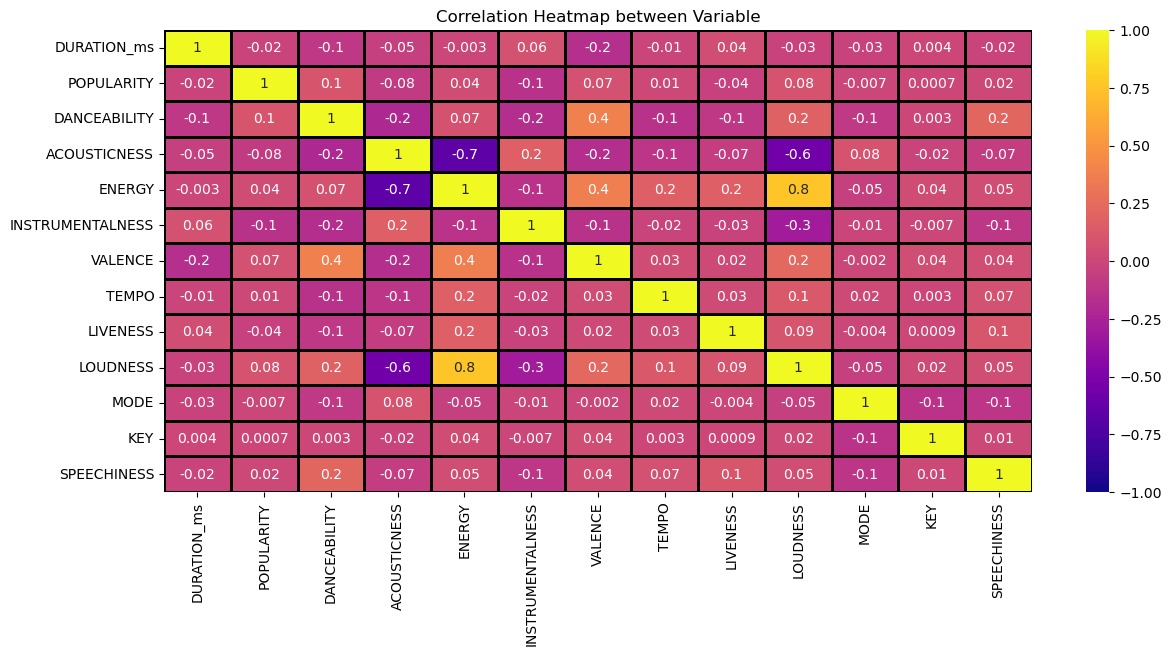

In [6]:
selected_columns = ['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                    'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                    'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

selected_df = cleaned_df[selected_columns]
cor = selected_df.corr(method = 'pearson')
plt.figure(figsize=(14,6))
map = sns.heatmap(cor, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='plasma', linewidths=1, linecolor='Black')
map.set_title('Correlation Heatmap between Variable')
map.set_xticklabels(map.get_xticklabels(), rotation=90)

# Feature Correlation Within Playlists
The heatmap is a useful for recognizing relationships between different musical features in our playlists. Grasping these correlations aids in curating playlists, allowing for a mix of track qualities to enhance diversity and engagement. By applying these insights, playlist curators can fine-tune their choices to create desired moods or themes, manipulating the mix of related features accordingly.



# Feature Correlation in Party playlists


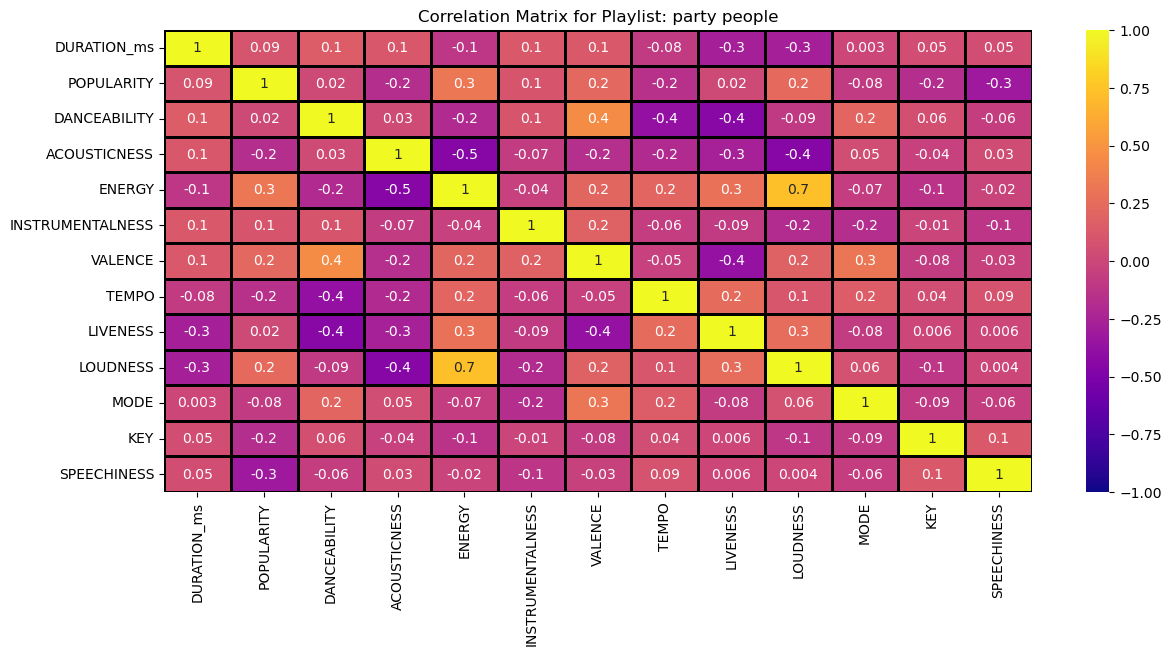

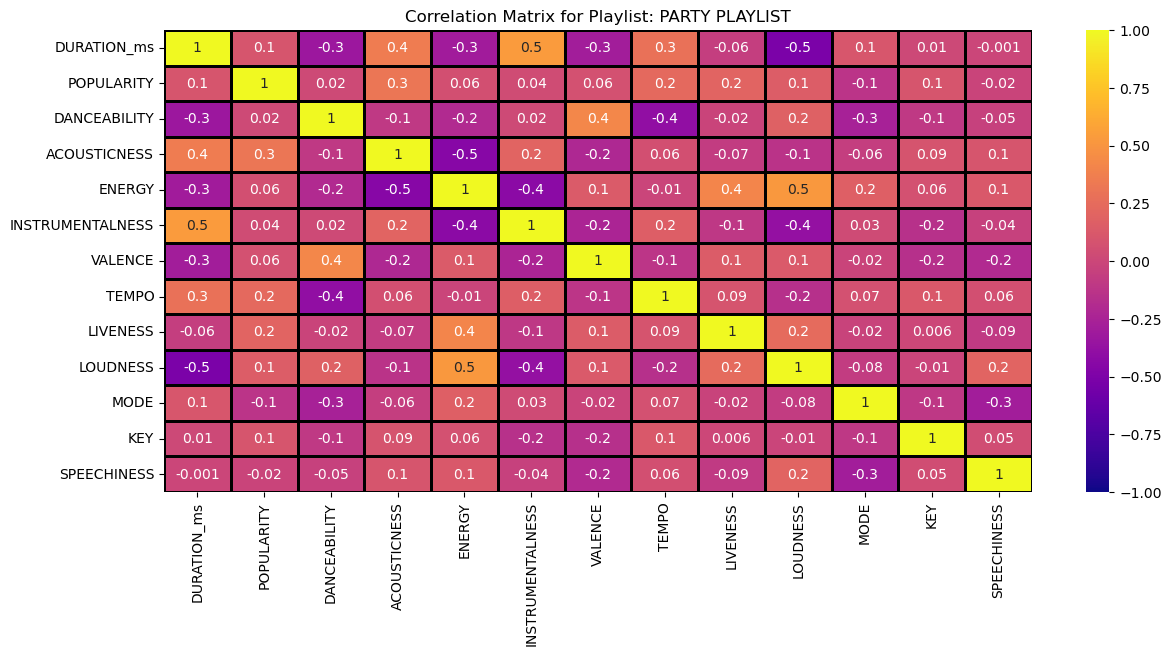

In [7]:
playlists = ['party people','PARTY PLAYLIST']
correlation_matrices = {}

for playlist_name in playlists:
    playlist_df = cleaned_df[cleaned_df['PLAYLIST_name'] == playlist_name]
    selected_columns = ['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                        'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                        'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']


    selected_df = playlist_df[selected_columns]
    cor = selected_df.corr(method='pearson')
    correlation_matrices[playlist_name] = cor


for playlist_name, cor_matrix in correlation_matrices.items():
    plt.figure(figsize=(14, 6))
    sns.heatmap(cor_matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='plasma', linewidths=1, linecolor='black')
    plt.title(f'Correlation Matrix for Playlist: {playlist_name}')
    plt.show()

# Finding best positive and best negative correlation of each feature


In [8]:
target_playlists = ['party people','PARTY PLAYLIST']
result_data = []


for playlist_name in target_playlists:
    cor_matrix = correlation_matrices[playlist_name]
    selected_columns = ['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                        'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                        'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']


    for feature in selected_columns:
        best_positive_corr = cor_matrix[feature].nlargest(2).iloc[1]
        best_positive_corr_feature = cor_matrix[feature].nlargest(2).index[1]

        best_negative_corr = cor_matrix[feature].nsmallest(1).iloc[0]
        best_negative_corr_feature = cor_matrix[feature].nsmallest(1).index[0]

        result_data.append({
            'Playlist': playlist_name,
            'Feature': feature,
            'Best_Positive_Correlation': best_positive_corr,
            'With_Positive_Feature': best_positive_corr_feature,
            'Best_Negative_Correlation': best_negative_corr,
            'With_Negative_Feature': best_negative_corr_feature
        })

result_df = pd.DataFrame(result_data)

# Bar plot of positive correlating features


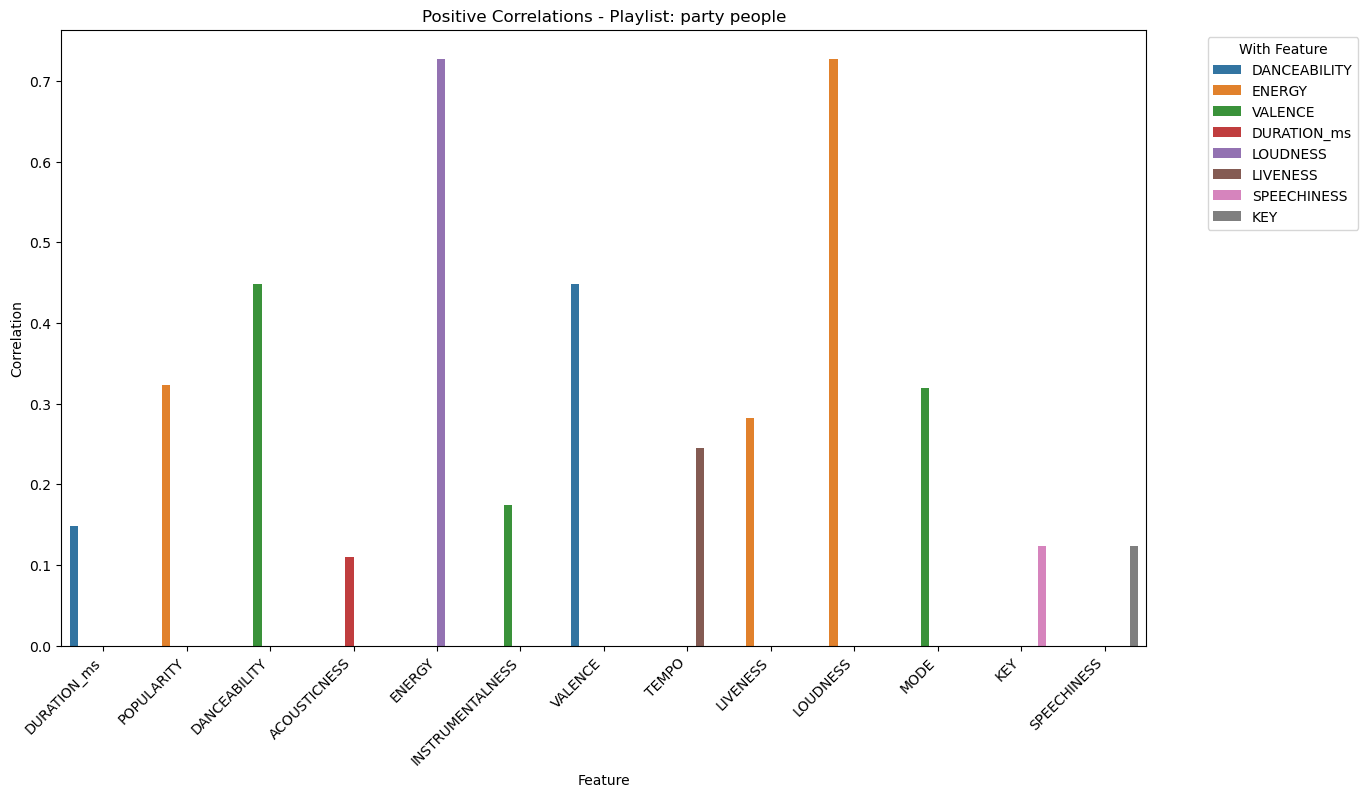

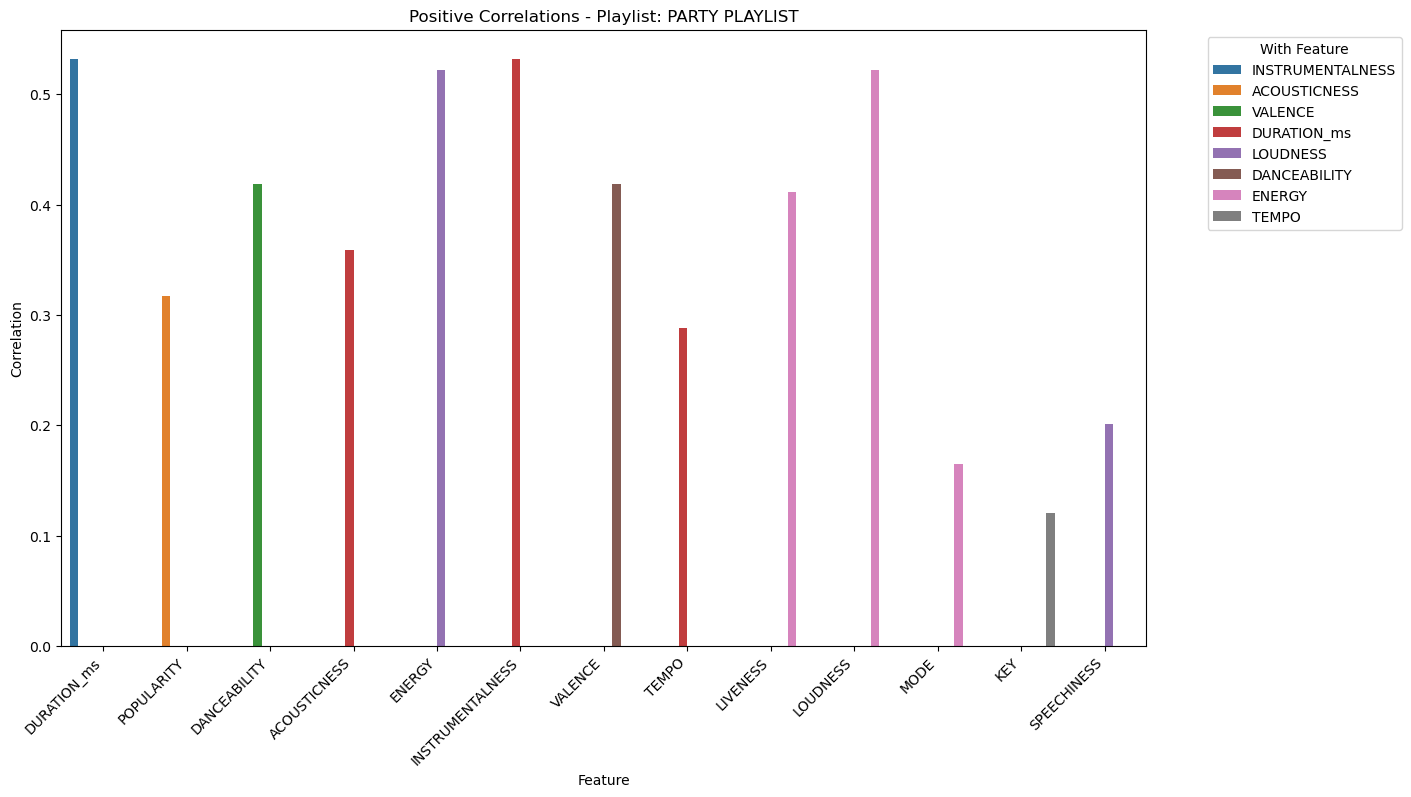

In [9]:

target_playlists = ['party people','PARTY PLAYLIST']

for playlist_name in target_playlists:
    playlist_df = result_df[result_df['Playlist'] == playlist_name]
    positive_df = playlist_df[playlist_df['Best_Positive_Correlation'] > 0]
    plt.figure(figsize=(14, 8))
    sns.barplot(data=positive_df, x='Feature', y='Best_Positive_Correlation', hue='With_Positive_Feature', dodge=True)
    plt.title(f'Positive Correlations - Playlist: {playlist_name}')
    plt.xlabel('Feature')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


The table highlighting the strongest correlations for each feature offers key insights into how different musical traits interact within our dataset. For example, in party playlists, 'ENERGY' and 'LOUDNESS' are positively correlated, indicating that louder tracks are usually more energetic. Likewise, 'DANCEABILITY' and 'VALENCE' have a strong positive relationship, suggesting danceable tracks often carry a more positive mood. However, correlations between 'DURATION_ms' and features like 'KEY' and 'MODE' are weaker, hinting at their relative independence in terms of musical characteristics. This table not only measures correlation strengths but also sheds light on specific connections between music features, enhancing our understanding of the data's underlying trends.



# Bar plot of negative correlating features


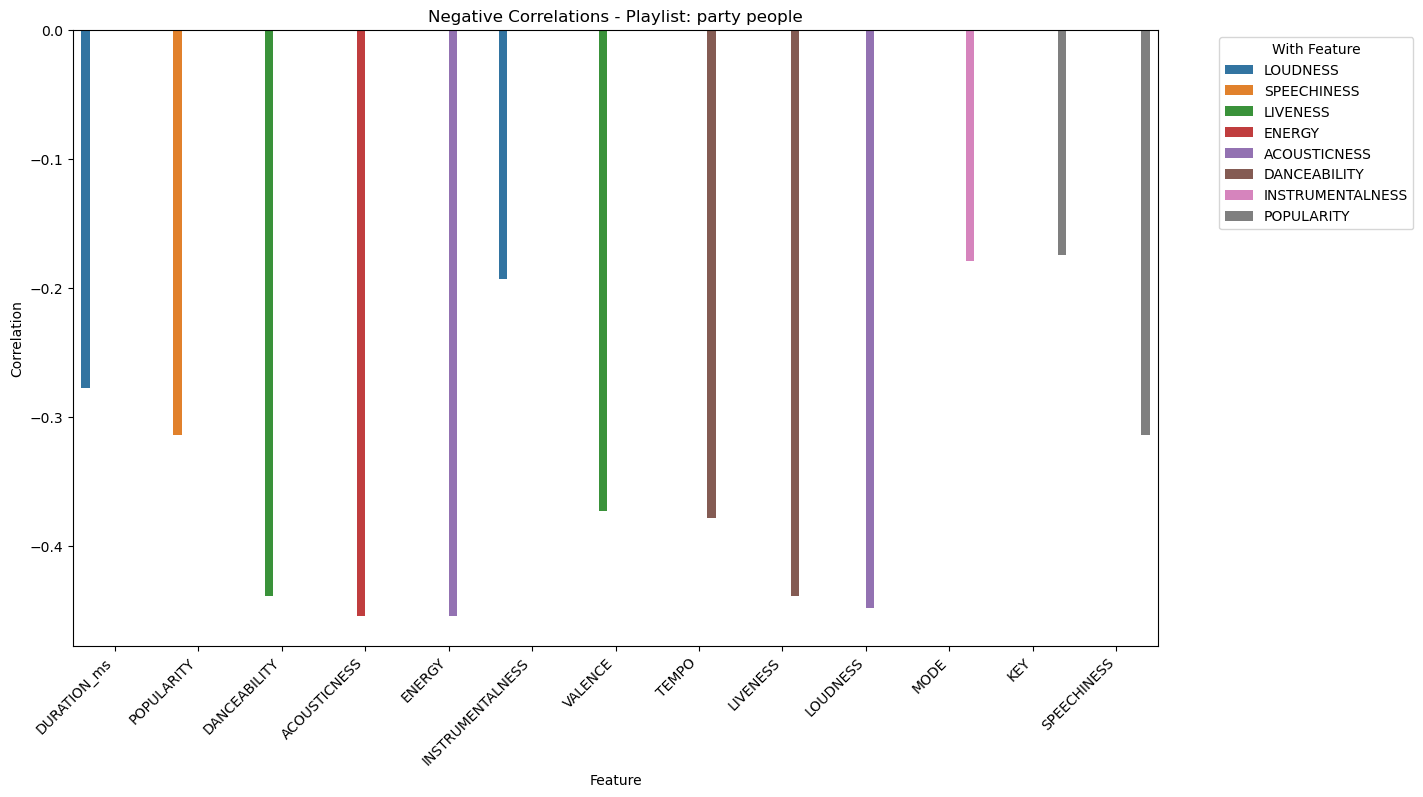

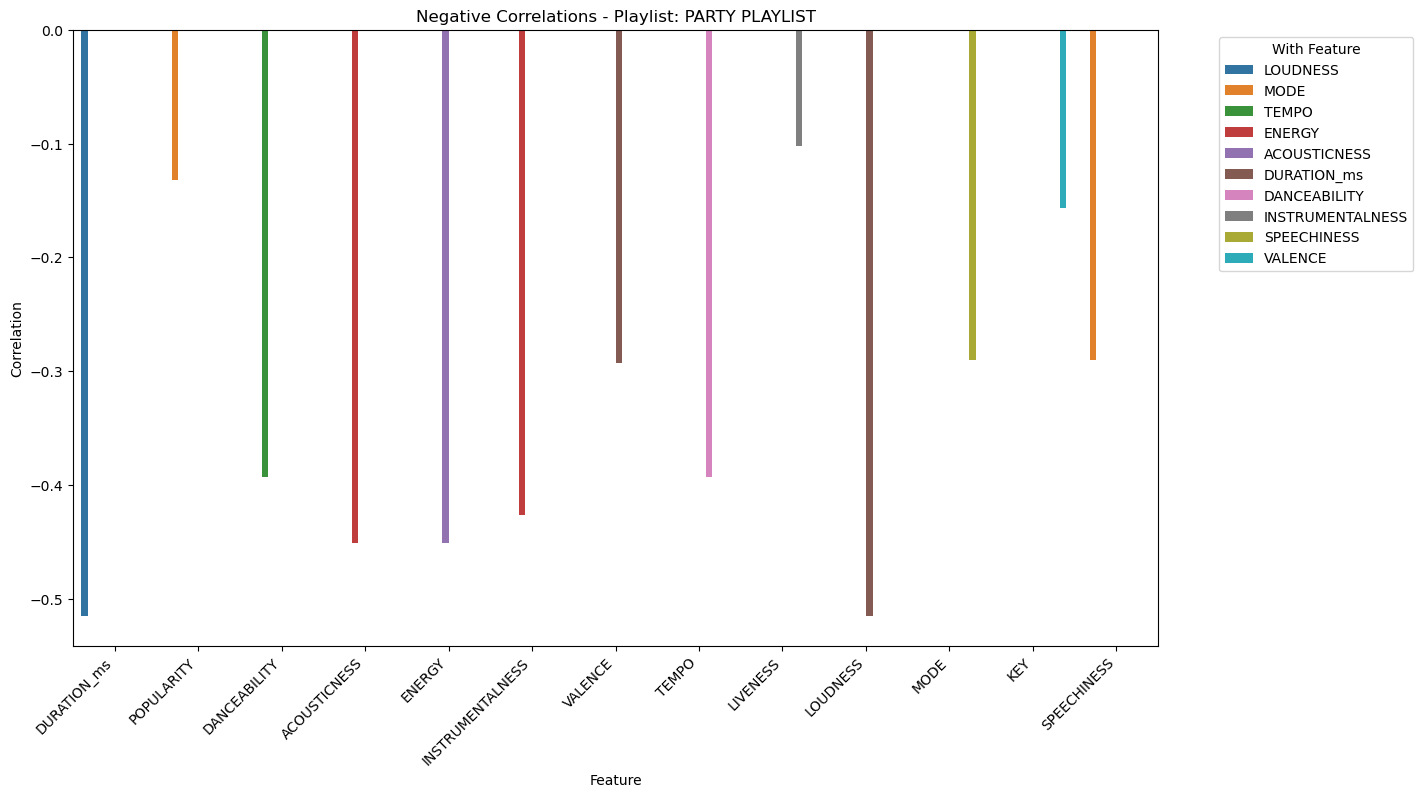

In [10]:
target_playlists = ['party people','PARTY PLAYLIST']
for playlist_name in target_playlists:
    playlist_df = result_df[result_df['Playlist'] == playlist_name]
    negative_df = playlist_df[playlist_df['Best_Negative_Correlation'] < 0]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=negative_df, x='Feature', y='Best_Negative_Correlation', hue='With_Negative_Feature', dodge=True)
    plt.title(f'Negative Correlations - Playlist: {playlist_name}')
    plt.xlabel('Feature')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In the "Party Playlist," there's a clear negative correlation between the energy and loudness of songs and their acousticness. This means that as songs become more energetic and louder, they tend to be less acoustic, and vice versa. This trend indicates a preference for high-energy, loud tracks with less acoustic quality in party playlists. This negative relationship between these attributes likely contributes to a vibrant, energetic party atmosphere. Understanding these correlations is crucial for playlist curators, as it helps in selecting tracks that strike the right balance between acoustic qualities and the desired levels of energy and loudness, enhancing the party experience.



# Feature Correlation in Sad Playlists


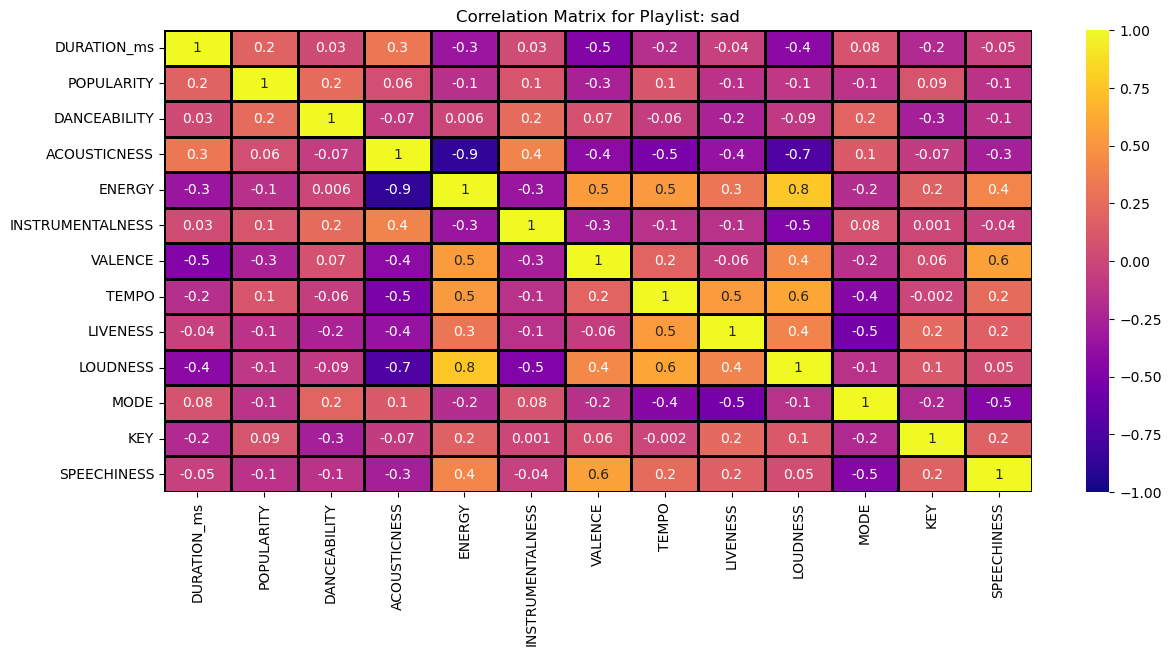

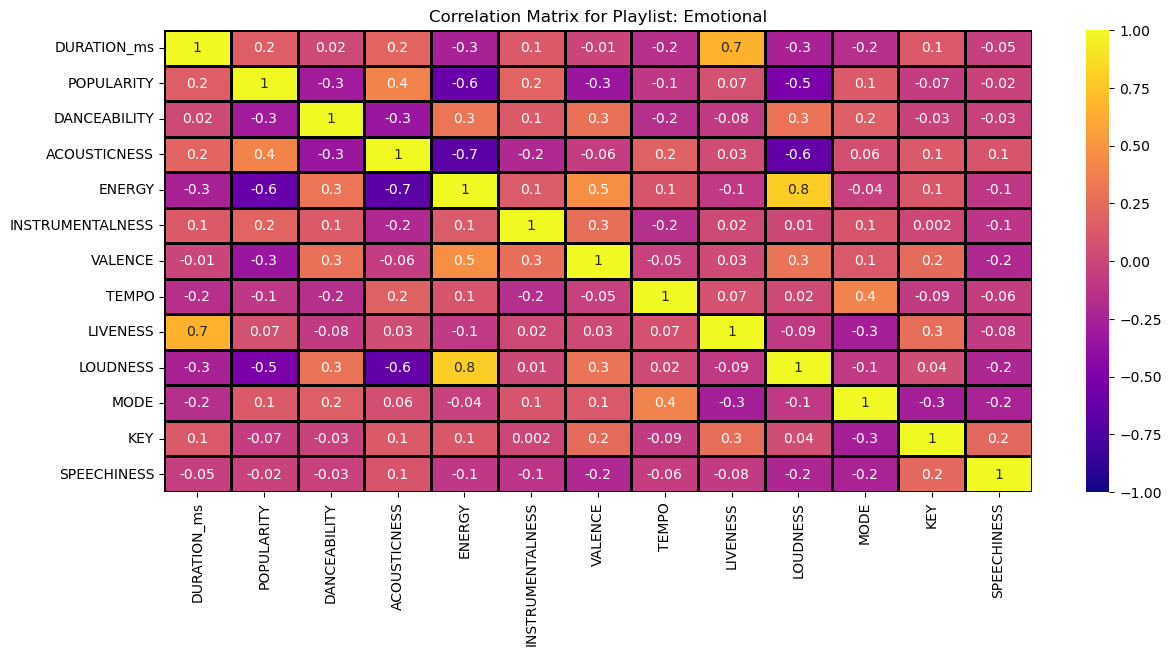

In [11]:
playlists = ['sad','Emotional']
correlation_matrices = {}

for playlist_name in playlists:
    playlist_df = cleaned_df[cleaned_df['PLAYLIST_name'] == playlist_name]

    selected_columns = ['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                        'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                        'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

    selected_df = playlist_df[selected_columns]

    cor = selected_df.corr(method='pearson')

    correlation_matrices[playlist_name] = cor

for playlist_name, cor_matrix in correlation_matrices.items():
    plt.figure(figsize=(14, 6))
    sns.heatmap(cor_matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='plasma', linewidths=1, linecolor='black')
    plt.title(f'Correlation Matrix for Playlist: {playlist_name}')
    plt.show()

In [12]:

target_playlists = ['sad','Emotional']

result_data = []

for playlist_name in target_playlists:

    cor_matrix = correlation_matrices[playlist_name]

    selected_columns = ['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                        'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                        'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

    for feature in selected_columns:
        best_positive_corr = cor_matrix[feature].nlargest(2).iloc[1]
        best_positive_corr_feature = cor_matrix[feature].nlargest(2).index[1]

        best_negative_corr = cor_matrix[feature].nsmallest(1).iloc[0]
        best_negative_corr_feature = cor_matrix[feature].nsmallest(1).index[0]

        result_data.append({
            'Playlist': playlist_name,
            'Feature': feature,
            'Best_Positive_Correlation': best_positive_corr,
            'With_Positive_Feature': best_positive_corr_feature,
            'Best_Negative_Correlation': best_negative_corr,
            'With_Negative_Feature': best_negative_corr_feature
        })


result_df = pd.DataFrame(result_data)


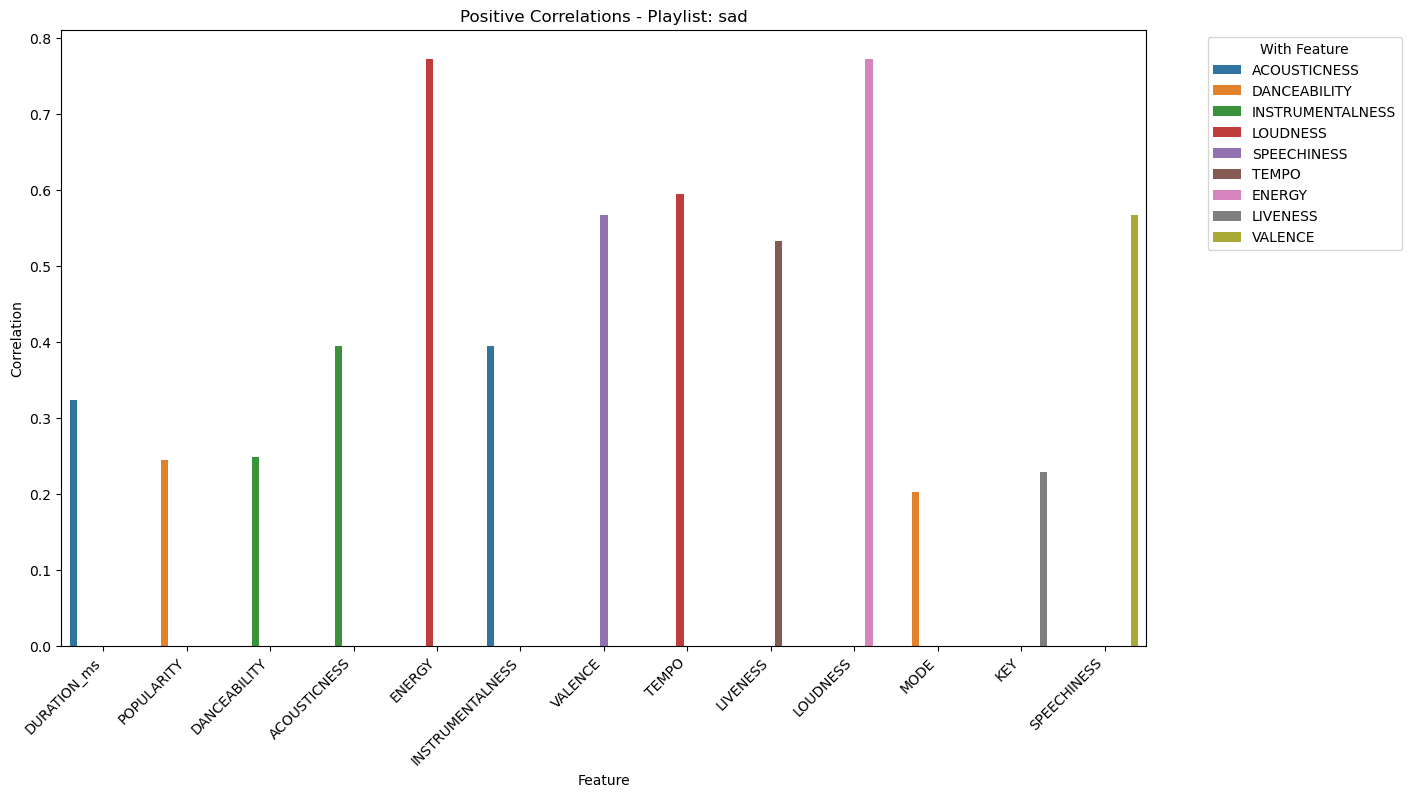

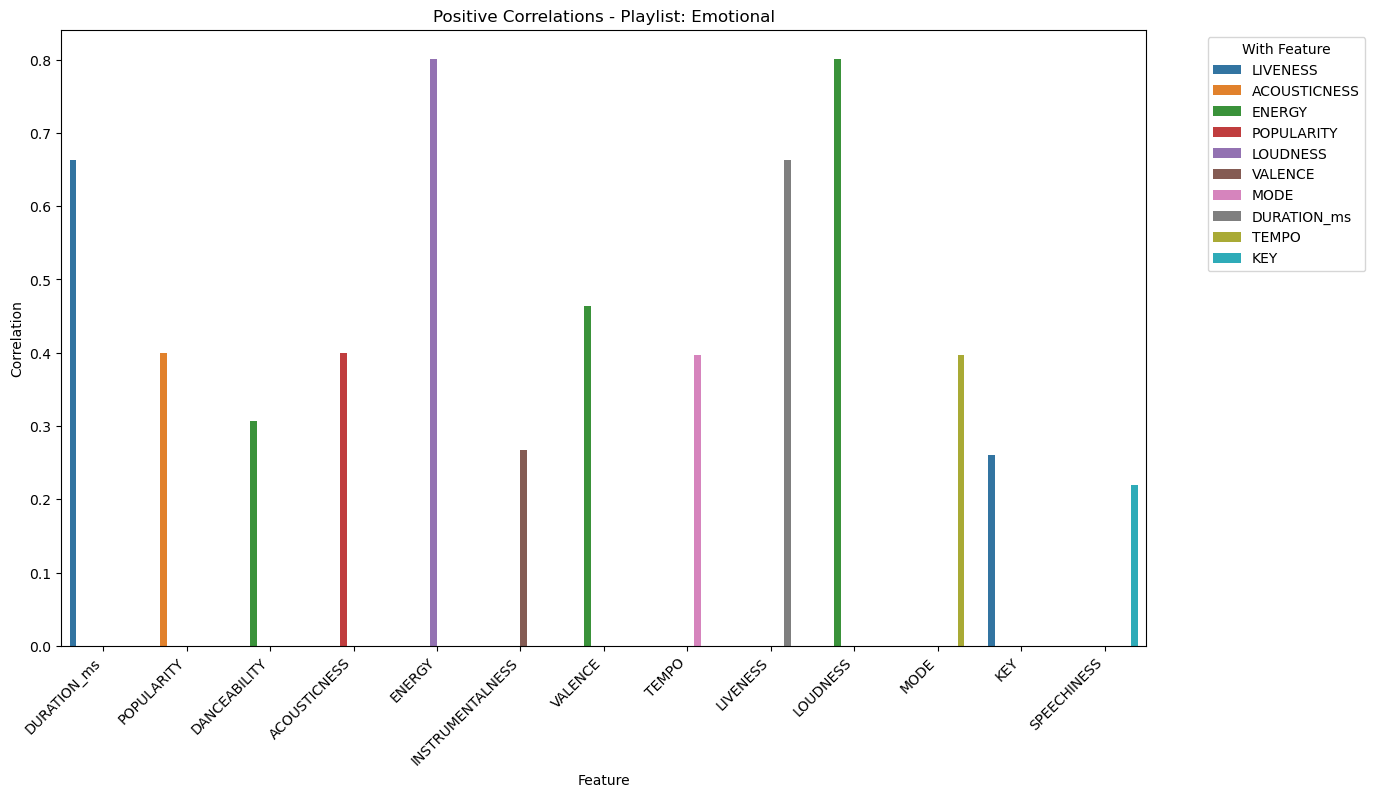

In [13]:

target_playlists = ['sad','Emotional']

for playlist_name in target_playlists:
    playlist_df = result_df[result_df['Playlist'] == playlist_name]

    positive_df = playlist_df[playlist_df['Best_Positive_Correlation'] > 0]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=positive_df, x='Feature', y='Best_Positive_Correlation', hue='With_Positive_Feature', dodge=True)
    plt.title(f'Positive Correlations - Playlist: {playlist_name}')
    plt.xlabel('Feature')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In the "Sad Playlist," there's a noticeable link between the energy and loudness of songs. This suggests that in sadder music, lower energy often goes hand in hand with reduced loudness. Essentially, the interaction of energy and loudness in these tracks shows a harmonized adjustment; as a song's energy level drops, its loudness tends to decrease as well. Additionally, there's a strong positive correlation between loudness and energy. This pattern highlights the deliberate coordination of these features to shape the emotional tone of the playlist, demonstrating a subtle relationship that becomes evident when the intensity of a sad song is purposefully altered.



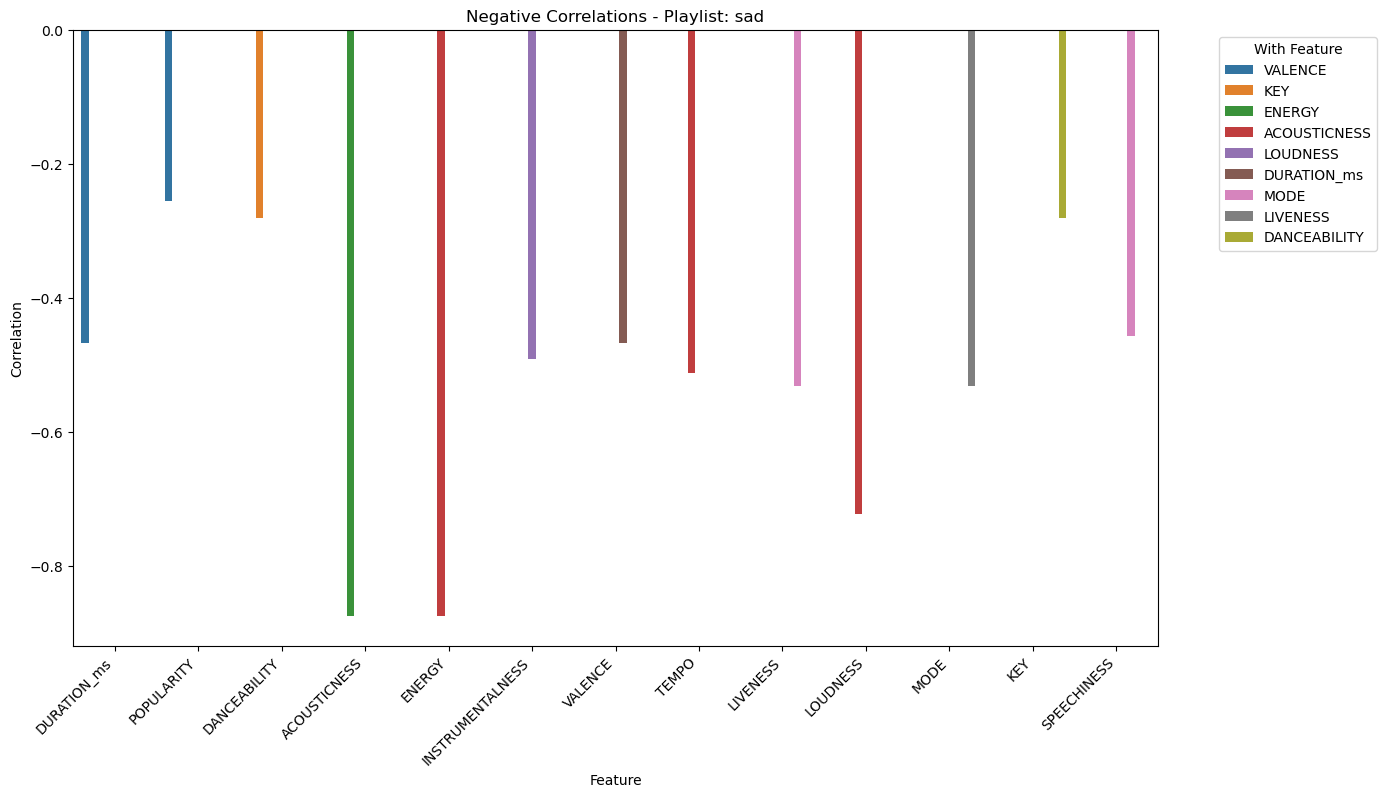

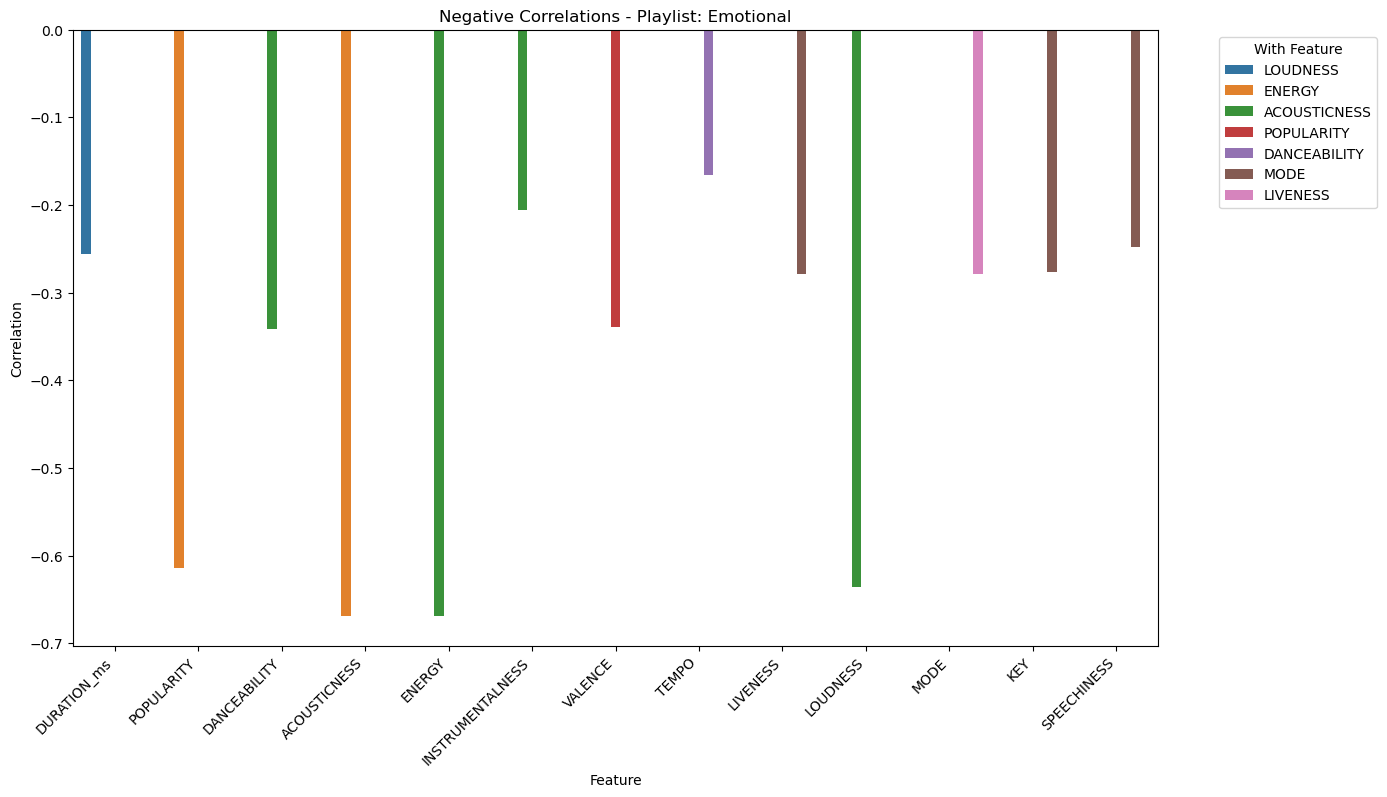

In [14]:

target_playlists = ['sad','Emotional']

for playlist_name in target_playlists:
    playlist_df = result_df[result_df['Playlist'] == playlist_name]
    negative_df = playlist_df[playlist_df['Best_Negative_Correlation'] < 0]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=negative_df, x='Feature', y='Best_Negative_Correlation', hue='With_Negative_Feature', dodge=True)
    plt.title(f'Negative Correlations - Playlist: {playlist_name}')
    plt.xlabel('Feature')
    plt.ylabel('Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='With Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In the "Sad Playlist," there's a distinct negative correlation between energy and loudness, and acoustic qualities. This means that in sad songs, lower energy or loudness is often associated with higher acoustic elements. Simply put, as songs become less intense emotionally, acoustic features become more pronounced. This trend indicates a deliberate choice in the playlist's design: as energetic aspects decrease, there's an intentional focus on enhancing acoustic elements. This negative correlation contributes significantly to the playlist's emotional depth, where the interplay between energy and acousticness is key in creating the desired somber mood for listeners seeking a reflective musical experience

# Regression plots


From above analysis, we can tell that energy, loudness and accousticness are highly correlated in every playlist.



# Regression plot - Correlation between Loudness and Energy


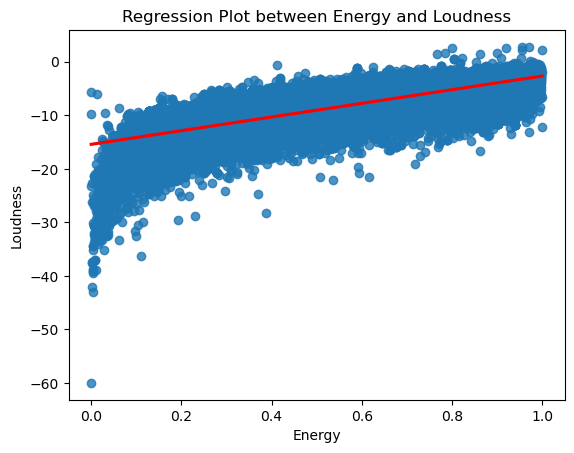

In [15]:

sns.regplot(x='ENERGY', y='LOUDNESS', data=cleaned_df, line_kws={"color": "red"})

plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Regression Plot between Energy and Loudness')
plt.show()

# Regression plot - Correlation between Energy and accousticness


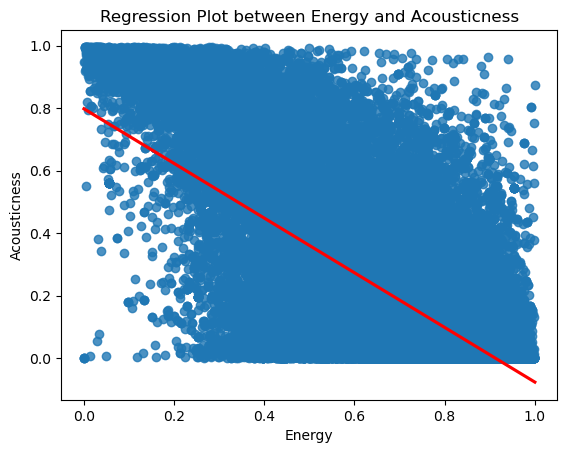

In [16]:

sns.regplot(x='ENERGY', y='ACOUSTICNESS', data=cleaned_df, line_kws={"color": "red"})

plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.title('Regression Plot between Energy and Acousticness')
plt.show()

In [17]:
target_playlists = ['party playlist','Party time','party people','PARTY PLAYLIST', 'sad','Sad Songs','Sad Songs','Emotional']

max_values_list = []
min_values_list = []
average_values_list = []
for playlist_name in target_playlists:
    playlist_df = cleaned_df[cleaned_df['PLAYLIST_name'] == playlist_name]

    max_values = playlist_df[['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                              'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                              'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']].max().to_dict()

    min_values = playlist_df[['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                              'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                              'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']].min().to_dict()

    average_values = playlist_df[['DURATION_ms', 'POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS',
                                   'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO',
                                   'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']].mean().to_dict()

    max_values = {'Playlist': playlist_name, **max_values}
    min_values = {'Playlist': playlist_name, **min_values}
    average_values = {'Playlist': playlist_name, **average_values}

    max_values_list.append(max_values)
    min_values_list.append(min_values)
    average_values_list.append(average_values)

max_values_df = pd.DataFrame(max_values_list)
min_values_df = pd.DataFrame(min_values_list)
average_values_df = pd.DataFrame(average_values_list)

# Correlation Coefficient - Looking at how the features correlate within playlists
This section delves into the statistical examination of 12 distinct musical features across 1000 playlists. The focus here is on calculating the average correlation coefficients for each feature, offering a comprehensive view of which features are most similar among songs within a playlist that go well together, and which are most different. The lower the correlation coefficient value, the less variation there is of that feature amongst songs in a given playlist.

In [18]:
df = pd.read_csv('./merged_playlist_without_duplicates_0_999.csv')

features = ['POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS',
            'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

df['INSTRUMENTALNESS'] += 1
df['INSTRUMENTALNESS'] = np.log(df['INSTRUMENTALNESS'])
playlist_means = df.groupby('PLAYLIST_id')[features].mean()

playlist_std_devs = df.groupby('PLAYLIST_id')[features].std()

playlist_cv = playlist_std_devs / playlist_means

mean_cv_across_playlists = playlist_cv.mean()

print("Coefficient of Variation for Each Feature Across All Playlists:")
print(mean_cv_across_playlists.abs().sort_values(ascending=True))


Coefficient of Variation for Each Feature Across All Playlists:
DANCEABILITY        0.224474
TEMPO               0.231924
ENERGY              0.288321
LOUDNESS            0.361070
VALENCE             0.445566
KEY                 0.709440
MODE                0.739922
LIVENESS            0.748324
SPEECHINESS         0.766054
POPULARITY          0.882664
ACOUSTICNESS        1.103751
INSTRUMENTALNESS    3.894765
dtype: float64


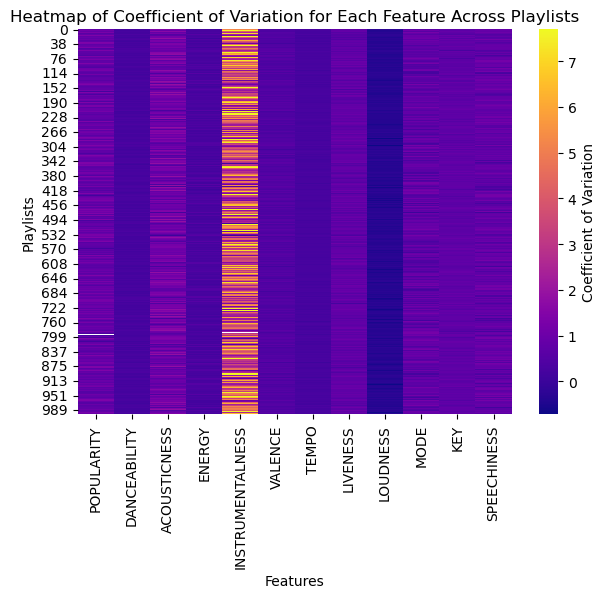

In [19]:
# Cap the values at the 95th percentile for each feature
cap_values = playlist_cv.quantile(0.95)
capped_playlist_cv = playlist_cv.clip(upper=cap_values, axis=1)

plt.figure(figsize=(7, 5))
sns.heatmap(capped_playlist_cv, cmap='plasma', cbar_kws={'label': 'Coefficient of Variation'})
plt.title('Heatmap of Coefficient of Variation for Each Feature Across Playlists')
plt.xlabel('Features')
plt.ylabel('Playlists')
plt.show()


This is a visual representation of the coefficients found above. As we can see, loudness, danceability, energy, and tempo tend to be the most similar amongst songs in a playlist, and instrumentalness tends to vary the most.



In [20]:
happy_df_1 = df[df['PLAYLIST_name'] == 'happy']
happy_df_2 = df[df['PLAYLIST_name'] == 'Happy Happy Happy']
sad_df_1 = df[df['PLAYLIST_name'] == 'tears.']
sad_df_2 = df[df['PLAYLIST_name'] == 'sad']
hype_df_1 = df[df['PLAYLIST_name'] == 'hype']
hype_df_2 = df[df['PLAYLIST_name'] == 'Hype']
chill_df_1 = df[df['PLAYLIST_name'] == 'chill']
chill_df_2 = df[df['PLAYLIST_name'] == 'Mega Chill']
romantic_df_1 = df[df['PLAYLIST_name'] == 'Love Music']
romantic_df_2 = df[df['PLAYLIST_name'] == 'Love']
holiday_df_1 = df[df['PLAYLIST_name'] == 'Holiday Party']
holiday_df_2 = df[df['PLAYLIST_name'] == 'VACATION']
workout_df_1 = df[df['PLAYLIST_name'] == 'Workout']
workout_df_2 = df[df['PLAYLIST_name'] == 'workout']
party_df_1 = df[df['PLAYLIST_name'] == 'Party mix']
party_df_2 = df[df['PLAYLIST_name'] == 'party']


def analyze_playlists(df_1, df_2, mood):
  total_df = pd.concat([df_1, df_2])

  df_unique = total_df.drop_duplicates(subset='TRACK_uri')
  print(df_unique.shape)

  mean_df = df_unique[features].mean()
  cv_df = df_unique[features].std()/mean_df
  print(mood + ' Means')
  print(mean_df)
  print('\n')
  print(mood + ' CVs')
  print(cv_df)
  print('\n')
  return mean_df, cv_df

mean_happy, cv_happy = analyze_playlists(happy_df_1, happy_df_2, 'Happy')
mean_sad, cv_sad = analyze_playlists(sad_df_1, sad_df_2, 'Sad')
mean_hype, cv_hype = analyze_playlists(hype_df_1, hype_df_2, 'Hype')
mean_chill, cv_chill = analyze_playlists(happy_df_1, happy_df_2, 'Chill')
mean_romantic, cv_romantic = analyze_playlists(sad_df_1, sad_df_2, 'Romantic')
mean_holiday, cv_holiday = analyze_playlists(hype_df_1, hype_df_2, 'Holiday')
mean_workout, cv_workout = analyze_playlists(happy_df_1, happy_df_2, 'Workout')
mean_party, cv_party = analyze_playlists(sad_df_1, sad_df_2, 'Party')


(106, 22)
Happy Means
POPULARITY           33.254717
DANCEABILITY          0.579340
ACOUSTICNESS          0.299475
ENERGY                0.620811
INSTRUMENTALNESS      0.020036
VALENCE               0.460890
TEMPO               117.617462
LIVENESS              0.146191
LOUDNESS             -7.243811
MODE                  0.877358
KEY                   4.245283
SPEECHINESS           0.053815
dtype: float64


Happy CVs
POPULARITY          1.000065
DANCEABILITY        0.232285
ACOUSTICNESS        1.054974
ENERGY              0.371413
INSTRUMENTALNESS    3.553818
VALENCE             0.527538
TEMPO               0.229782
LIVENESS            0.561022
LOUDNESS           -0.404928
MODE                0.375654
KEY                 0.863078
SPEECHINESS         0.948769
dtype: float64


(96, 22)
Sad Means
POPULARITY           28.437500
DANCEABILITY          0.486284
ACOUSTICNESS          0.526137
ENERGY                0.456509
INSTRUMENTALNESS      0.143050
VALENCE               0.294464
TEMPO    

# Looking at how features vary across moods
This section aims to look at how the different features vary across happy playlists, sad playlists, and hype playlists.



In [21]:
def plot_distribution_bar_graphs(df_dict, features):
    num_features = len(features)

    num_moods = len(df_dict)

    fig, axes = plt.subplots(num_features, num_moods, figsize=(3 * num_moods, 2 * num_features))

    for i, feature in enumerate(features):
        for j, (mood, df) in enumerate(df_dict.items()):
            ax = axes[i, j] if num_features > 1 else axes[j]
            df[feature].plot(kind='hist', ax=ax, alpha=0.7, label=mood, bins=15)
            ax.set_title(f'{feature} - {mood}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_for_moods(df_dict, features):
    num_features = len(features)
    num_moods = len(df_dict)

    colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow', 'peachpuff', 'plum', 'lightpink', 'powderblue']

    # Set Seaborn style
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

    for i, feature in enumerate(features):
        ax = axes[i] if num_features > 1 else axes
        data = [df[feature] for df in df_dict.values()]

        # Use Seaborn boxplot
        sns.boxplot(data=data, ax=ax, palette=colors[:num_moods], width=0.7)

        ax.set_title(feature)
        ax.set_ylabel('Value')

        # Set x-axis labels
        ax.set_xticklabels(df_dict.keys())

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df_dict is a dictionary of DataFrames and features is a list of features to plot
# plot_boxplots_for_moods(df_dict, features)


# Example usage:
# Assuming df_dict is a dictionary of DataFrames and features is a list of features to plot
# plot_boxplots_for_moods(df_dict, features)


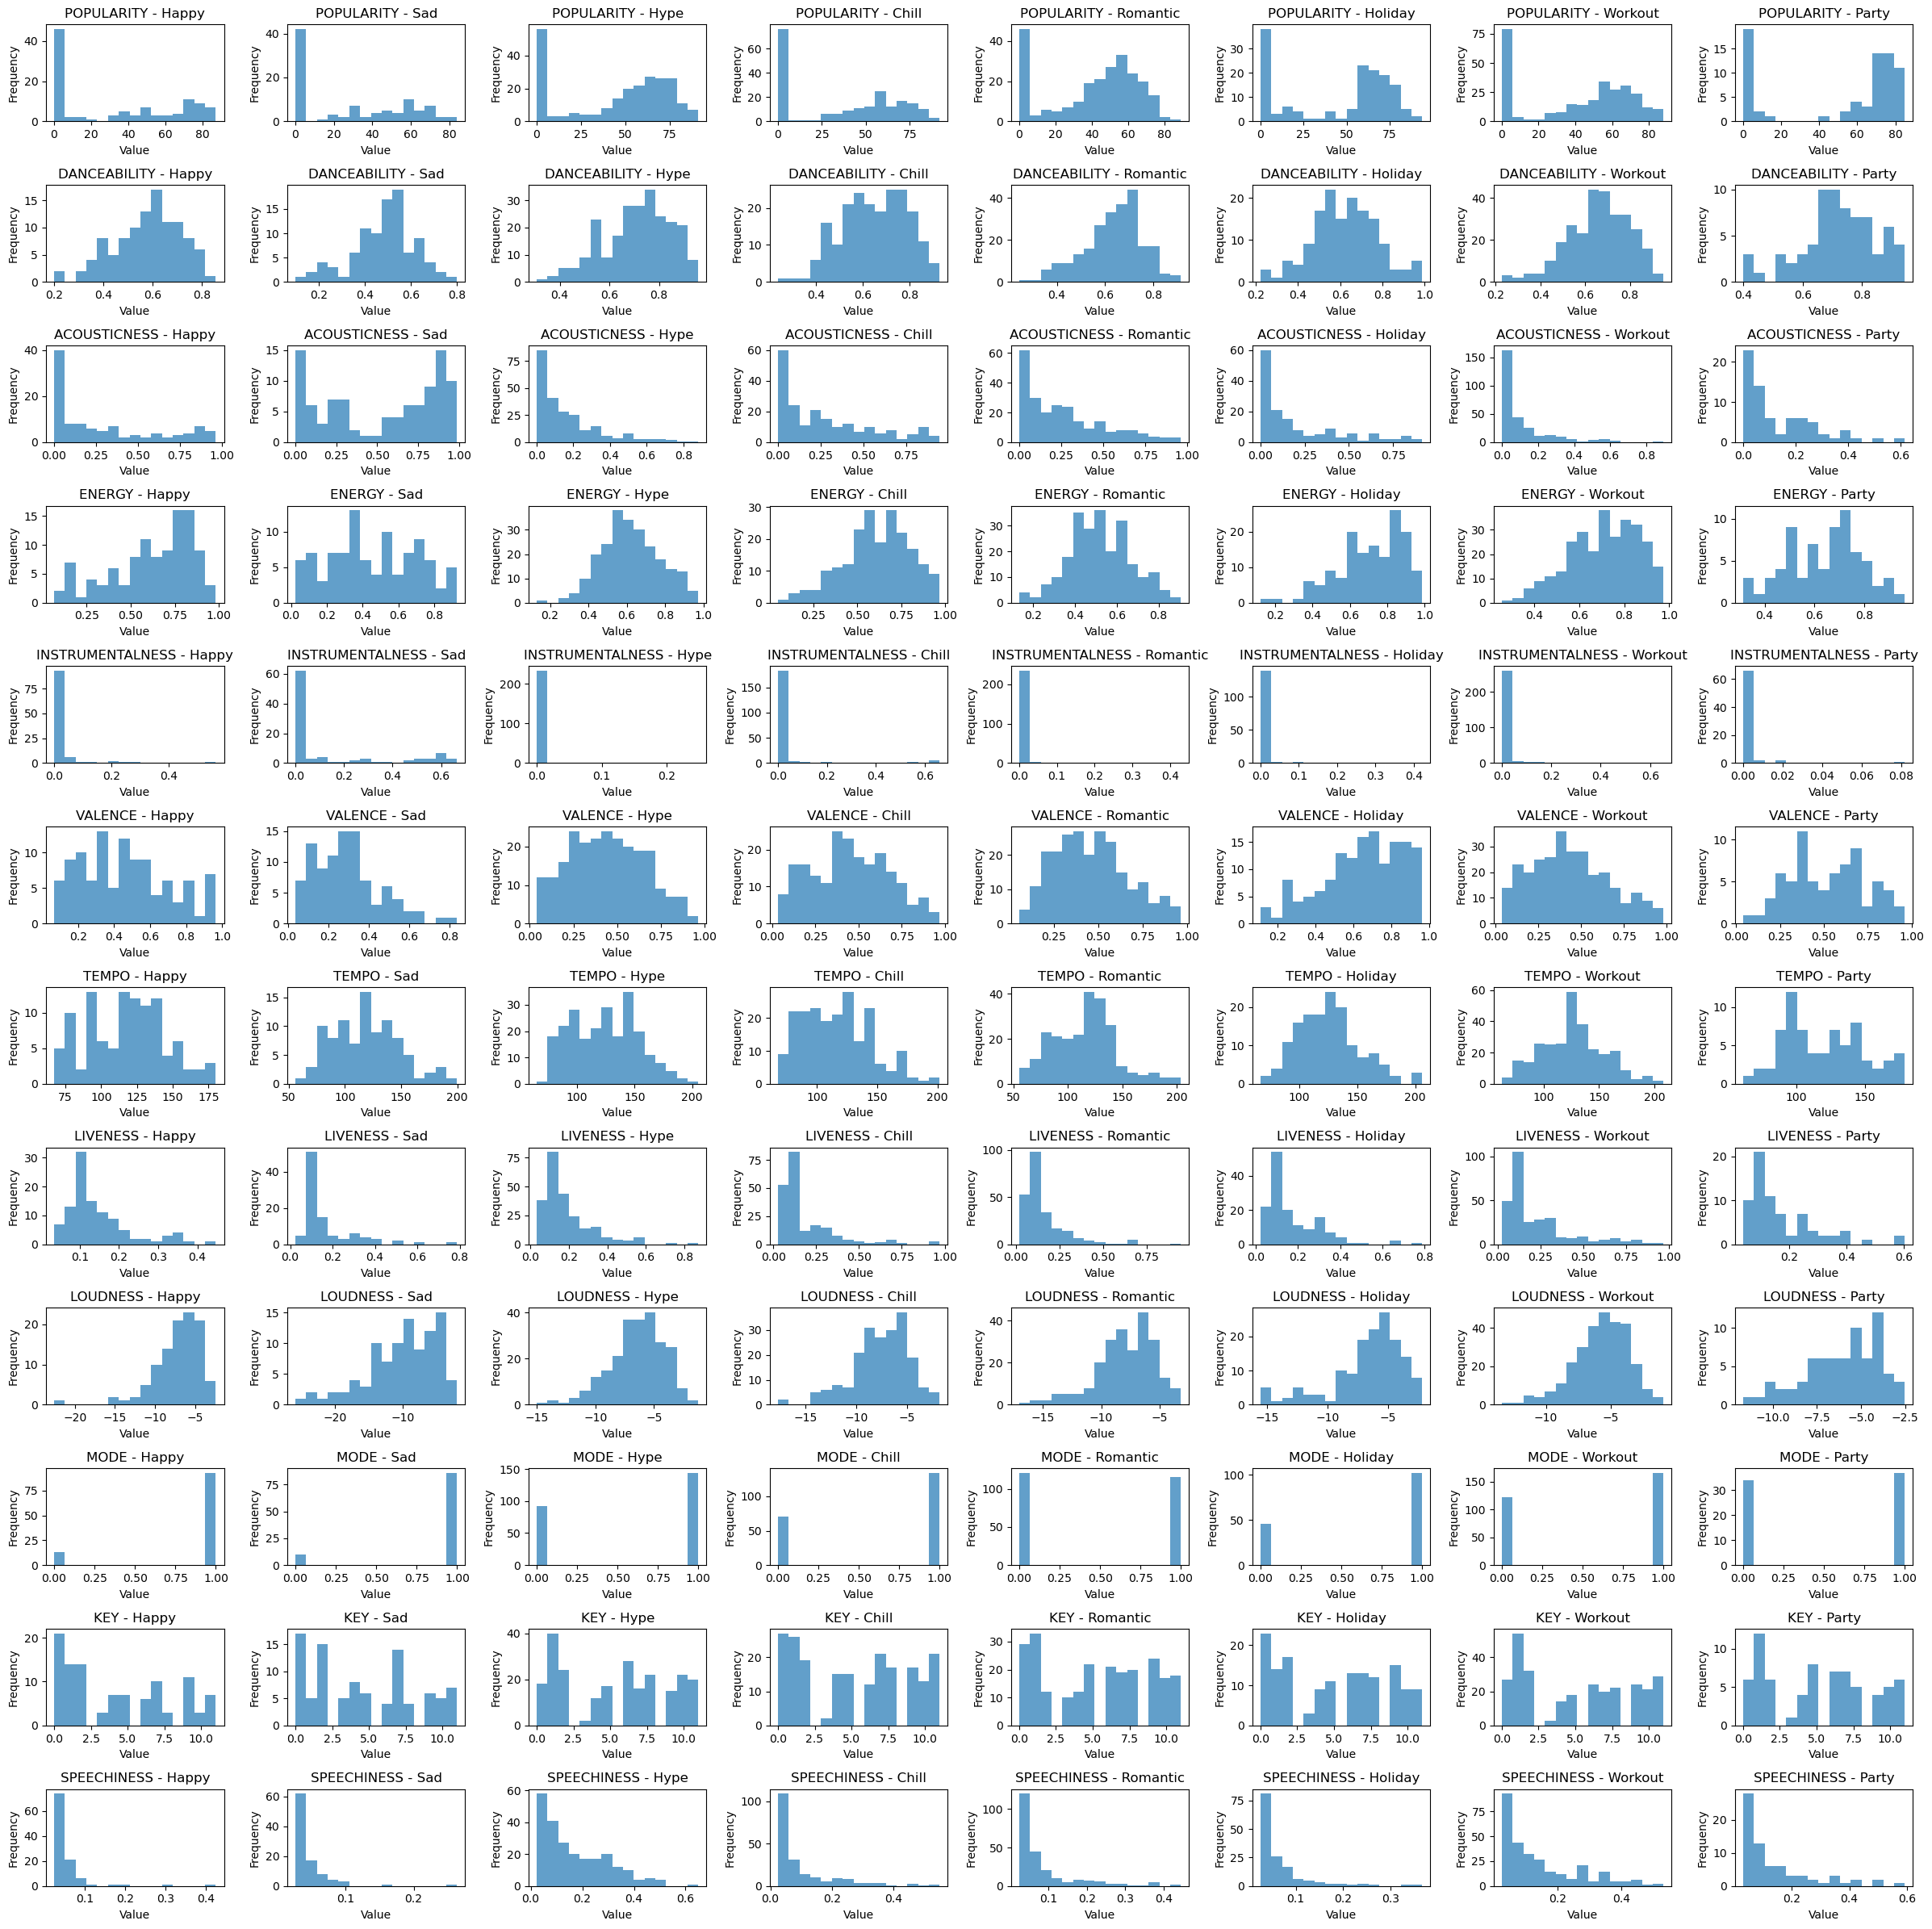

In [23]:
features = ['POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS',
            'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

mood_dfs = {'Happy': pd.concat([happy_df_1, happy_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Sad': pd.concat([sad_df_1, sad_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Hype': pd.concat([hype_df_1, hype_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Chill': pd.concat([chill_df_1, chill_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Romantic': pd.concat([romantic_df_1, romantic_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Holiday': pd.concat([holiday_df_1, holiday_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Workout': pd.concat([workout_df_1, workout_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Party': pd.concat([party_df_1, party_df_2]).drop_duplicates(subset='TRACK_uri')}

plot_distribution_bar_graphs(mood_dfs, features)



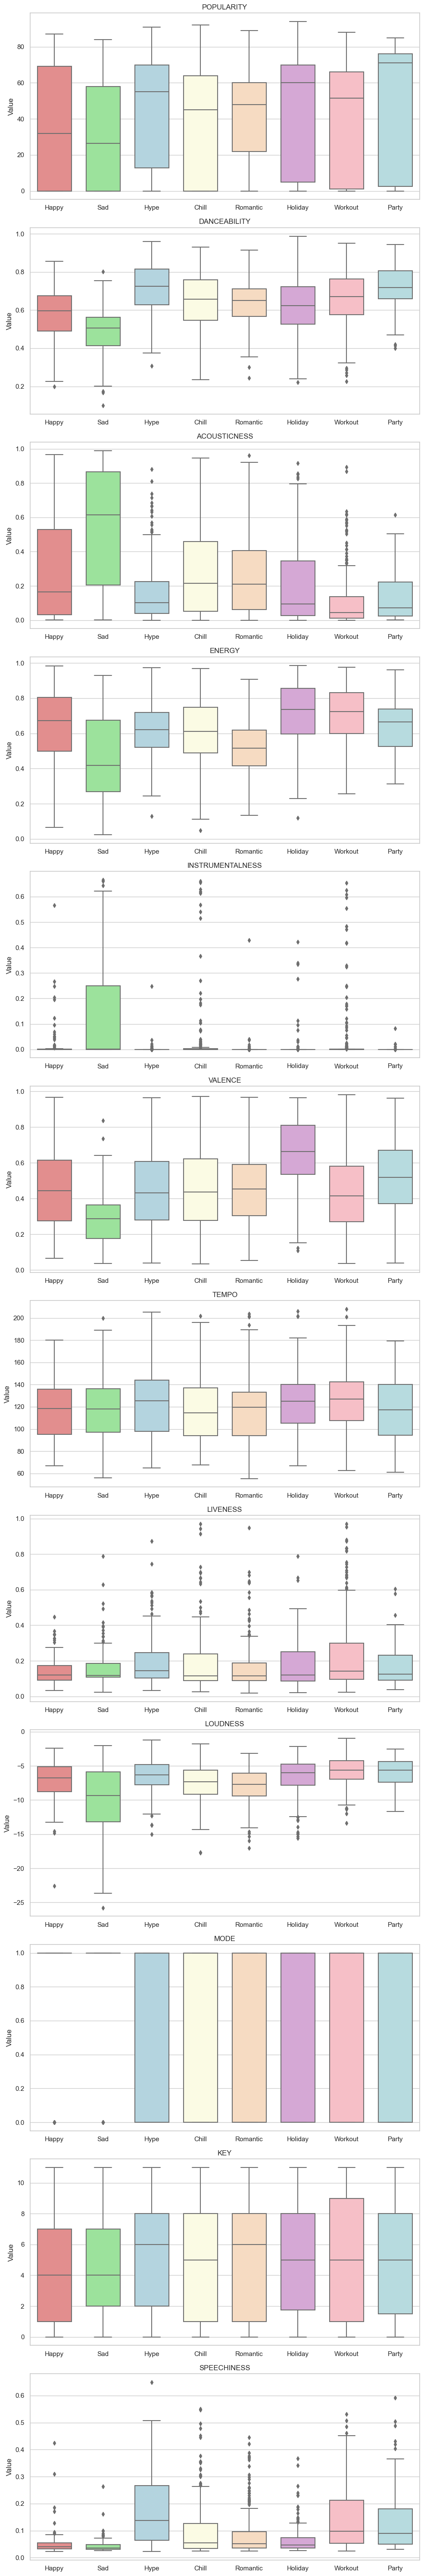

In [24]:
plot_boxplots_for_moods(mood_dfs, features)

This section visually depicts how the features vary across moods. The most notable differences seem to be that hype playlists have the highest values for speechiness, danceability, and popularity. Happy and hype playlists tend to have higher loudness and energy values than sad playlists. Sad playlists tend to have much higher acousticness values compared to happy and hype playlists.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./merged_playlist_without_duplicates_0_999.csv')

# Analysing Playlist Popularity vs Track features

In [26]:
def analyse_playlist_popularity(df = df, k = 3):
    '''
    Assigns the median of track popularities per playlist as the playlist popularity, computes the correlation between playlist popularity
    and each track feature. It also generates a correlation heatmap for playlist popularity v/s track features. Additional functionality of
    analysing only top k playlists with highest playlist popularity is presented by the fucntion.

    Parameters
    ----------
    df : A DataFrame
        The default is df.
    k : An integer
        The default is 3.

    Returns
    -------
        A correlation heatmap between each track feature v/s playlist popularity.

    '''
    assert isinstance(df, pd.DataFrame), 'Invalid input for df; must be a DataFrame'
    assert isinstance(k, int) and k > 0, 'Invalid input for k; must be a positive integer'

    popularity_per_playlist = df.groupby('PLAYLIST_id')['POPULARITY'].median()
    top_k_playlist_popularities = popularity_per_playlist.nlargest(k)
    top_k_popular_playlists = top_k_playlist_popularities.index.to_list()
    popularity_per_playlist = pd.DataFrame(df.groupby('PLAYLIST_id')['POPULARITY'].median())
    popularity_per_playlist.rename(columns = {'POPULARITY':'PLAYLIST_POPULARITY'}, inplace = True)
    popularity_per_playlist = popularity_per_playlist.loc[popularity_per_playlist.index.repeat(df.groupby('PLAYLIST_id')['TRACK_uri'].count())].reset_index(drop=True)
    if 'PLAYLIST_POPULARITY' in df.columns:
        pass
    else:
        df.insert(df.shape[1], 'PLAYLIST_POPULARITY', popularity_per_playlist, allow_duplicates = False)

    df_filtered = df[df['PLAYLIST_id'].isin(top_k_popular_playlists)]
    df_filtered = df_filtered[['DURATION_ms', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS', 'PLAYLIST_POPULARITY']]

    features_correlation_with_popularity = df_filtered.corr()[['PLAYLIST_POPULARITY']].sort_values(by='PLAYLIST_POPULARITY', ascending=False)
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(features_correlation_with_popularity, vmin=-1, vmax=1, annot=True, center=True)
    heatmap.set_title('Correlation Heatmap for Playlist Popularity v/s Track features', fontdict={'fontsize':12}, pad=12);
    return heatmap

# Correlation Heatmap for Playlist Popularity v/s Track features

Observation:

1. No significant correlation between audio features of the track and playlist popularity is observed.
2. Surprisingly, songs with high danceability tend to negatively impact the playlist popularity which is against the general notion.

Inference:

1. Playlist popularity depends maybe on other underlying non-audio features of a track such as the number of times a track has been played and how recent those plays were, explaining the unusual observation.

<Axes: title={'center': 'Correlation Heatmap for Playlist Popularity v/s Track features'}>

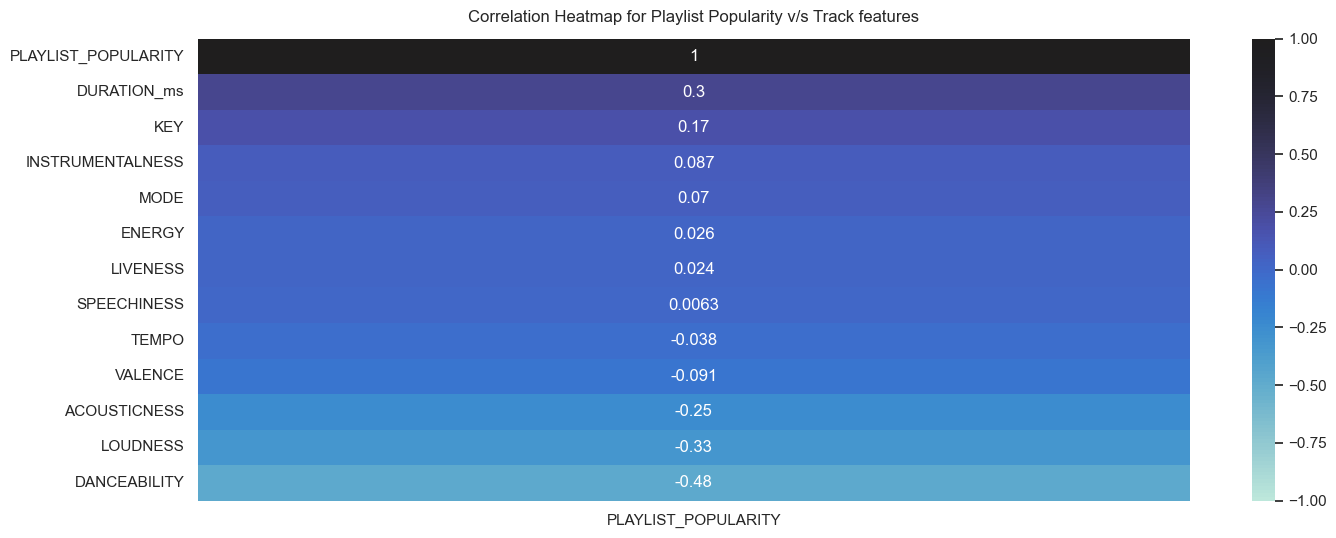

In [27]:
analyse_playlist_popularity(df, k = 3)

# Analysing Number of Tracks per playlist v/s Track features

In [28]:
def analyse_track_count_per_playlist(df = df, k = 3):
    '''
    Counts the number of tracks per playlists, computes the correlation between number of tracks per playlist and each track feature.
    It also generates a correlation heatmap for number of tracks per playlist v/s track features. Additional functionality of analysing
    only top k playlists with most songs is presented by the fucntion.
    playlists.

    Parameters
    ----------
    df : A DataFrame
        The default is df.
    k : An integer
        The default is 3.

    Returns
    -------
        A correlation heatmap between each track feature v/s number of songs per playlist.
    '''
    assert isinstance(df, pd.DataFrame), 'Invalid input for df; must be a DataFrame'
    assert isinstance(k, int) and k > 0, 'Invalid input for k; must be a positive integer'

    tracks_per_playlist = df.groupby('PLAYLIST_id')['TRACK_uri'].count()

    top_k_playlist_with_most_songs = tracks_per_playlist.nlargest(k)
    top_k_playlist_ids_with_most_songs = top_k_playlist_with_most_songs.index.to_list()

    tracks_per_playlist = pd.DataFrame(tracks_per_playlist)
    tracks_per_playlist.rename(columns = {'TRACK_uri':'TRACK_count'}, inplace = True)
    tracks_per_playlist = tracks_per_playlist.loc[tracks_per_playlist.index.repeat(tracks_per_playlist['TRACK_count'])].reset_index(drop=True)

    if 'TRACK_count' in df.columns:
        pass
    else:
        df.insert(df.shape[1], 'TRACK_count', tracks_per_playlist, allow_duplicates = False)

    df_filtered = df[df['PLAYLIST_id'].isin(top_k_playlist_ids_with_most_songs)]
    df_filtered = df_filtered[['DURATION_ms', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS', 'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS', 'TRACK_count']]

    features_correlation_with_num_songs_per_playlist = df_filtered.corr()[['TRACK_count']].sort_values(by='TRACK_count', ascending=False)

    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(features_correlation_with_num_songs_per_playlist, vmin=-1, vmax=1, annot=True, center=True)
    heatmap.set_title('Correlation Heatmap for Number of Tracks per playlist v/s Track features', fontdict={'fontsize':12}, pad=12);
    return heatmap

# Correlation Heatmap for Number of Tracks per playlist v/s Track features

Observation:

1. Acousticness has a high positive correlation with the number of songs per playlist while Loudness, Energy and Danceability show significant negative correlation.

Inference:

1. Longer playlists tend to have songs which are more Acoustic and less on Loudness, Energy and Danceability.


<Axes: title={'center': 'Correlation Heatmap for Number of Tracks per playlist v/s Track features'}>

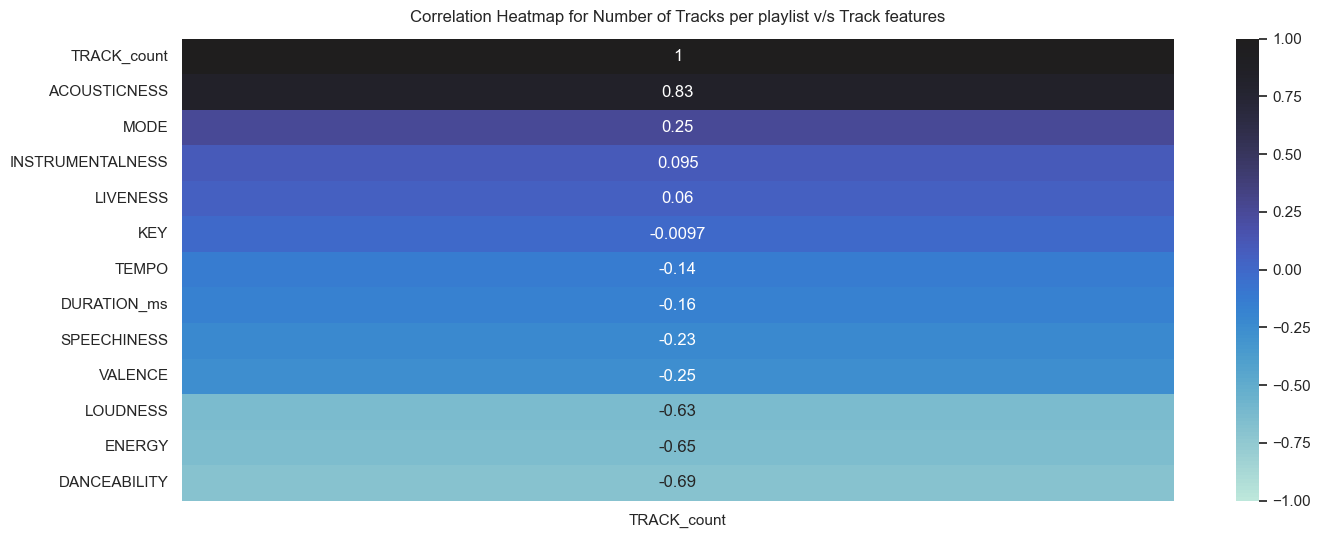

In [29]:
analyse_track_count_per_playlist(df, k = 3)

# Conclusion

In conclusion, the pursuit of understanding the significance of audio features in curating cohesive playlists has provided valuable insights into the intricate art of music curation. Below observations were made

## Features that are highly correlated: 
Danceability, Loudness and Accousticness

## Features that determine the mood of a playlist:
### Hype playlists: 
Higher speechiness, danceability, and popularity
### Happy and hype playlists: 
Higher loudness and energy
### Sad playlists:
Higher acousticness 
## Features that vary the least within a playlist
Danceability, tempo, energy
## Features that determine the playlist popularity:
Doesn’t depend on audio features of track 
Depends on number of times a track has been played and recency of plays
## Features that determine the length of the playlist:
Longer playlists - More Acoustic songs, Less party songs



# References
1. https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge 
2. https://developer.spotify.com/documentation/web-api 